Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

[IMDB PT BR](https://www.kaggle.com/luisfredgs/imdb-ptbr)

In [ ]:
import pandas as pd

textos = pd.read_csv("/content/drive/MyDrive/Curso_PLN/imdb-reviews-pt-br.csv")
textos.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


Definindo dados de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

treino, teste, c_treino, c_teste = train_test_split(textos.text_pt, textos.sentiment, random_state = 42)

In [ ]:
teste

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
                               ...                        
16421    Crescendo como filho do cinema, uma das trilog...
39861    Este filme é o melhor filme de todos os tempos...
309      "Electra Glide in Blue" é um movimento lento e...
20638    Eu amo esse filme ! Eu acho que já vi 5 vezes ...
38935    Eu vi alguns filmes sobre transtornos alimenta...
Name: text_pt, Length: 12365, dtype: object

In [ ]:
c_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [ ]:
treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [ ]:
c_treino

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression

r_log = LogisticRegression()
r_log.fit(treino, c_treino)
ac = r_log.score(teste, c_teste)
print(ac)

ValueError: ignored

Erro! Qual o motivo?

Primeiro: conhecer aspectos dos textos.

In [ ]:
#Negativa
print(textos.text_pt[189])
#Este é sem dúvida o PIOR filme...

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [ ]:
#Poitivo
print(textos.text_pt[49002])
#...BRILHANTE...

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você 

In [ ]:
print(textos.sentiment.value_counts())
#Está bem balanceado?
classi = textos["sentiment"].replace(["neg", "pos"], [0,1])
textos["classi"] = classi

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [ ]:
textos.head()

,id,text_en,text_pt,sentiment,classi
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


![Screenshot 2022-02-10 at 10-37-48 introducao-ao-pln-com-python Aula1 ipynb at master · alura-cursos introducao-ao-pln-com-p[...].png](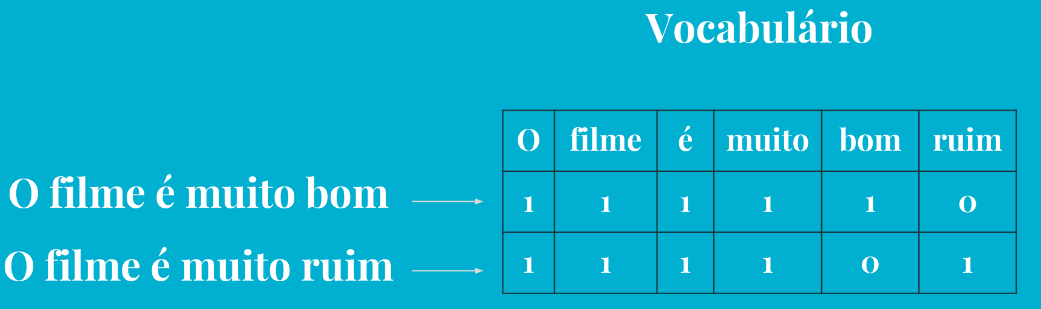)

#O filme é muito muito bom.

#O filme é péssimo.

![Screenshot 2022-02-10 at 10-41-11 introducao-ao-pln-com-python Aula1 ipynb at master · alura-cursos introducao-ao-pln-com-p[...].png](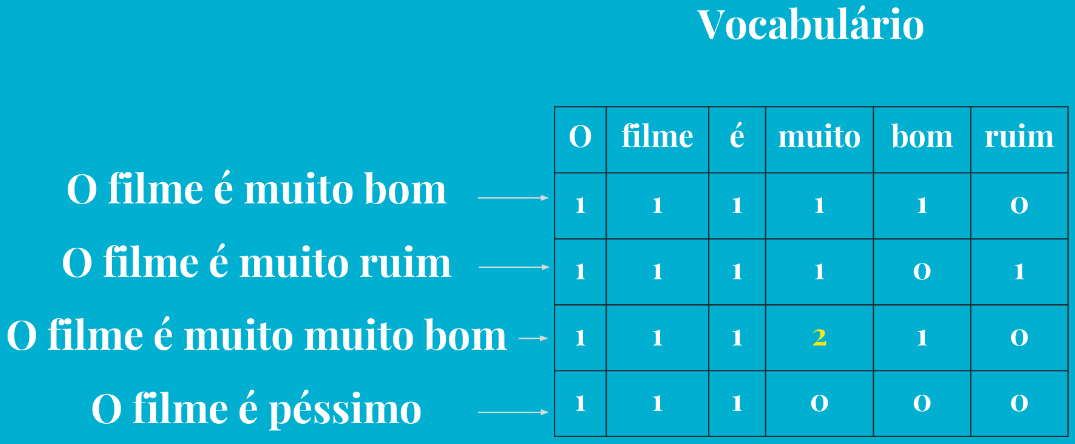)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

duas_frases = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vet = CountVectorizer(lowercase=False)
bw= vet.fit_transform(duas_frases)
vet.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [ ]:
matriz = pd.DataFrame.sparse.from_spmatrix(bw, columns=vet.get_feature_names_out())
matriz

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0
